In [2]:
#%% Import modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.cm as cm

In [3]:
### Now let's do 4 chunks
#proj_dir = '/gpfs3/well/win-fmrib-analysis/users/psz102/osld_scripts/hcp_scripts'
proj_dir = '/gpfs3/well/win-fmrib-analysis/users/psz102/nets_project/nets_predict'
load_dir = f"{proj_dir}/results/archiveKEEP/chunk_accuracies"
n_chunk = 4
n_states = [3,6,9,12,15]

prediction_accuracy_static_icov = np.load(f"{load_dir}/prediction_accuracy_static_icov_{n_chunk}_chunks.npz")
prediction_accuracy_static_actual_icov = np.load(f"{load_dir}/prediction_accuracy_static_actual_icov_{n_chunk}_chunks.npy")
group_level_prediction_accuracy_dynamic_icov = np.load(f"{load_dir}/group_level_prediction_accuracy_dynamic_icov_{n_chunk}_chunks.npz")
prediction_accuracy_dynamic_icov = np.load(f"{load_dir}/prediction_accuracy_dynamic_icov_{n_chunk}_chunks.npz")

prediction_accuracy_dynamic_icov_icov = prediction_accuracy_dynamic_icov['prediction_accuracy_dynamic_icov'][0,:,:,:]
group_level_prediction_accuracy_dynamic_icov_icov = group_level_prediction_accuracy_dynamic_icov['prediction_accuracy_dynamic_icov'][0,:,:,:]
prediction_accuracy_static_actual_icov_icov = prediction_accuracy_static_actual_icov[0,:,:]
prediction_accuracy_static_icov_icov = prediction_accuracy_static_icov['prediction_accuracy_static_icov'][0,:,:]

# Combine the arrays
combined_array = np.concatenate((prediction_accuracy_static_actual_icov_icov[np.newaxis], prediction_accuracy_static_icov_icov[np.newaxis], prediction_accuracy_dynamic_icov_icov), axis=0)

# Print the shape of the combined array
print(combined_array.shape)


(3, 1003, 4)


In [4]:
print(prediction_accuracy_static_icov['beta_static'].shape)
#print(prediction_accuracy_static_icov['beta_static'][:,:,:,300,:])
print(np.squeeze(np.nanmean(np.nanmean(prediction_accuracy_static_icov['beta_static'],axis=2),axis=2)).shape)
bar_plot = np.squeeze(np.nanmean(np.nanmean(prediction_accuracy_static_icov['beta_static'],axis=2),axis=2))
bar_plot.shape

(1, 4, 10, 325, 325)
(4, 325)


/tmp/ipykernel_330978/2403303094.py:3: RuntimeWarning: Mean of empty slice
  print(np.squeeze(np.nanmean(np.nanmean(prediction_accuracy_static_icov['beta_static'],axis=2),axis=2)).shape)
/tmp/ipykernel_330978/2403303094.py:4: RuntimeWarning: Mean of empty slice
  bar_plot = np.squeeze(np.nanmean(np.nanmean(prediction_accuracy_static_icov['beta_static'],axis=2),axis=2))


(4, 325)

In [5]:
# let's plot one of the chunks as a brain region x brain region (25 x 25) heatmap
print(bar_plot.shape)
feat = bar_plot[0,:]
covs_remake = np.zeros((25,25))
m, n = np.triu_indices(25)
covs_remake[m, n] = feat
covs_remake[n, m] = feat

# Define the brain networks
brain_networks = ['VIS', 'VIS', 'VIS', 'DM', 'FP', 'VAT', 'DM', 'DM', 'VIS', 'FP',
               'FP', 'ATT', 'SSM', 'VIS', 'AUD', 'DAT', 'EC', 'ATT', 'DM',
               'EC', 'SSM', 'CB', 'SN', 'THAL', 'BG']

(4, 325)


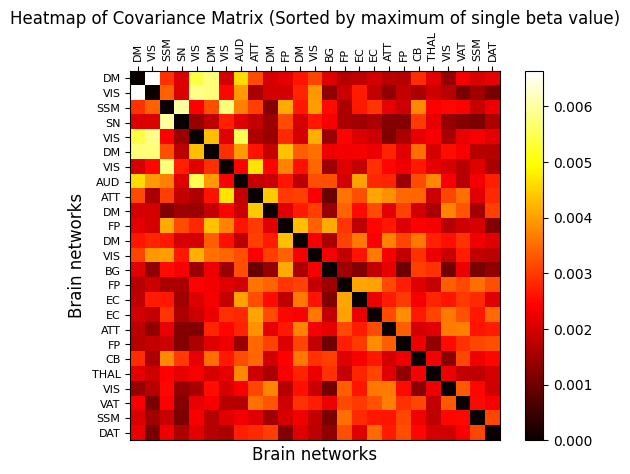

In [6]:
# Calculate the maximum values of each row
row_max_values = np.max(covs_remake, axis=1)

# Get the sorting indices based on the maximum values
sorting_indices = np.argsort(row_max_values)[::-1]

# Reorder the covariance matrix and brain networks based on the sorting indices
covs_remake_sorted = covs_remake[sorting_indices][:, sorting_indices]
brain_networks_sorted = [brain_networks[i] for i in sorting_indices]

# Create a new figure
fig, ax = plt.subplots()

# Create the heatmap
heatmap = ax.imshow(covs_remake_sorted, cmap='hot')

# Remove the grey grid lines
ax.grid(False)

# Add a colorbar
cbar = plt.colorbar(heatmap)

# Set the x-axis and y-axis labels as "Brain networks"
ax.set_xlabel("Brain networks", fontsize=12)
ax.set_ylabel("Brain networks", fontsize=12)

# Set the x-axis and y-axis tick positions and labels
ax.set_xticks(range(25))
ax.set_yticks(range(25))
ax.set_xticklabels(brain_networks_sorted, fontsize=8, rotation=90)
ax.set_yticklabels(brain_networks_sorted, fontsize=8)

# Move the x-axis tick labels to the top
ax.xaxis.set_ticks_position('top')

# Set the title
plt.title("Heatmap of Covariance Matrix (Sorted by maximum of single beta value)")

# Show the figure
plt.show()

In [7]:
# # Calculate the mean values of each row
# row_means = np.mean(covs_remake, axis=1)

# # Get the sorting indices based on the mean values
# sorting_indices = np.argsort(row_means)[::-1]

# # Reorder the covariance matrix and brain networks based on the sorting indices
# covs_remake_sorted = covs_remake[sorting_indices][:, sorting_indices]
# brain_networks_sorted = [brain_networks[i] for i in sorting_indices]

# # Create a new figure
# fig, ax = plt.subplots()

# # Create the heatmap
# heatmap = ax.imshow(covs_remake_sorted, cmap='hot')

# # Remove the grey grid lines
# ax.grid(False)

# # Add a colorbar
# cbar = plt.colorbar(heatmap)

# # Set the x-axis and y-axis labels as "Brain networks"
# ax.set_xlabel("Brain networks", fontsize=12)
# ax.set_ylabel("Brain networks", fontsize=12)

# # Set the x-axis and y-axis tick positions and labels
# ax.set_xticks(range(25))
# ax.set_yticks(range(25))
# ax.set_xticklabels(brain_networks_sorted, fontsize=8, rotation=90)
# ax.set_yticklabels(brain_networks_sorted, fontsize=8)

# # Move the x-axis tick labels to the top
# ax.xaxis.set_ticks_position('top')

# # Set the title
# plt.title("Heatmap of Covariance Matrix (Sorted by mean beta across 25 regions)")

# # Show the figure
# plt.show()

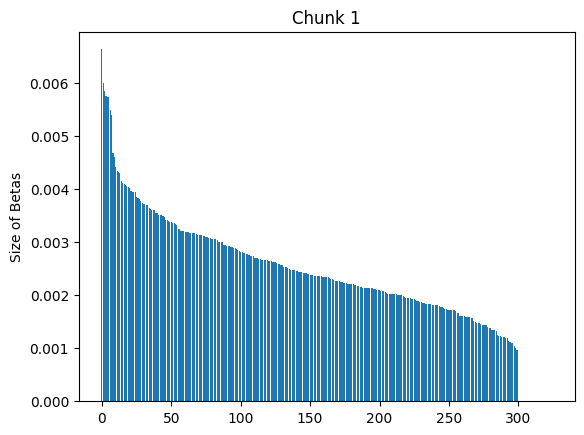

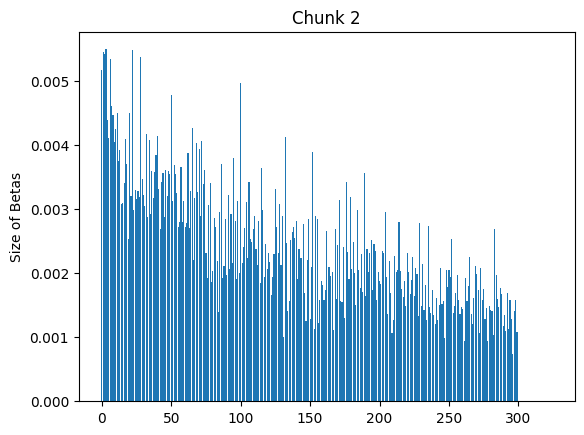

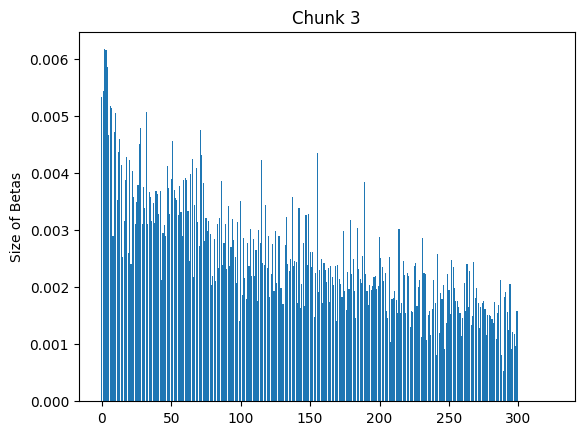

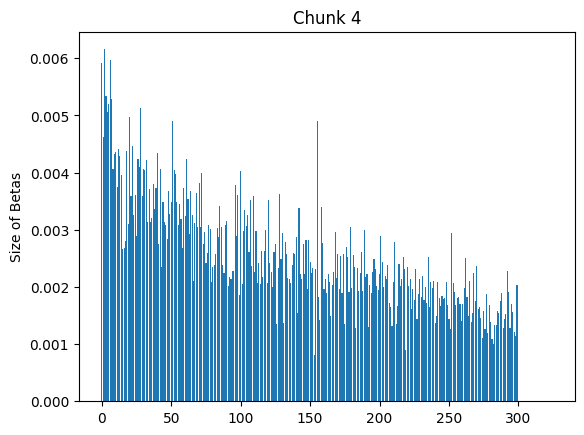

In [8]:
# Sort the first figure's data in descending order
sorted_data = np.sort(bar_plot[0])[::-1]

# Create a figure for each chunk
for i in range(4):
    # Create a new figure
    fig = plt.figure()

    # Set the title
    chunk_title = f"Chunk {i+1}"
    plt.title(chunk_title)

    # Get the corresponding data for the current chunk
    data = bar_plot[i]

    # Sort the data based on the order of the first figure
    sorted_data_chunk = [data[idx] for idx in np.argsort(bar_plot[0])[::-1]]

    # Create the bar chart using the sorted data
    plt.bar(range(len(sorted_data_chunk)), sorted_data_chunk)

    # Set the y-axis label
    plt.ylabel("Size of Betas")

    # Show the current figure
    plt.show()

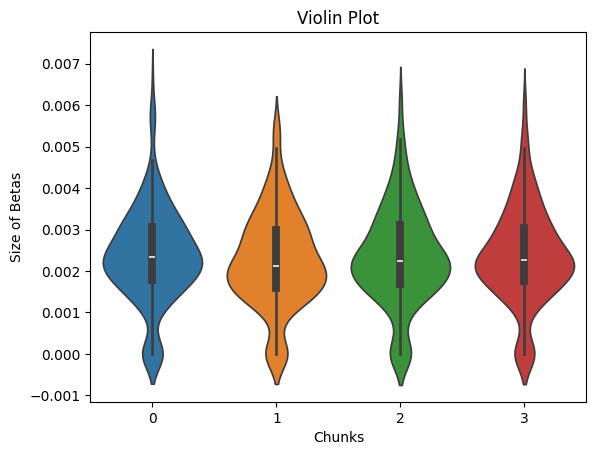

In [9]:
# Create a new figure
fig = plt.figure()

# Set the title
plt.title("Violin Plot")

# Create the violin plot with four violins
sns.violinplot(data=bar_plot.T)

# Set the x-axis label
plt.xlabel("Chunks")

# Set the y-axis label
plt.ylabel("Size of Betas")

# Show the figure
plt.show()

In [10]:
print(bar_plot.shape)

(4, 325)


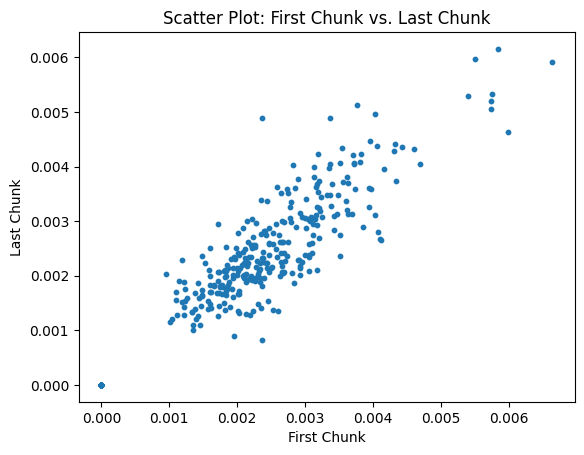

In [11]:
# Get the values for the first and last chunk
first_chunk = bar_plot[0]
last_chunk = bar_plot[-1]

# Create a new figure
fig = plt.figure()

# Set the title
plt.title("Scatter Plot: First Chunk vs. Last Chunk")

# Create the scatter plot
plt.scatter(first_chunk, last_chunk, s=10)

# Set the x-axis label
plt.xlabel("First Chunk")

# Set the y-axis label
plt.ylabel("Last Chunk")

# Show the figure
plt.show()

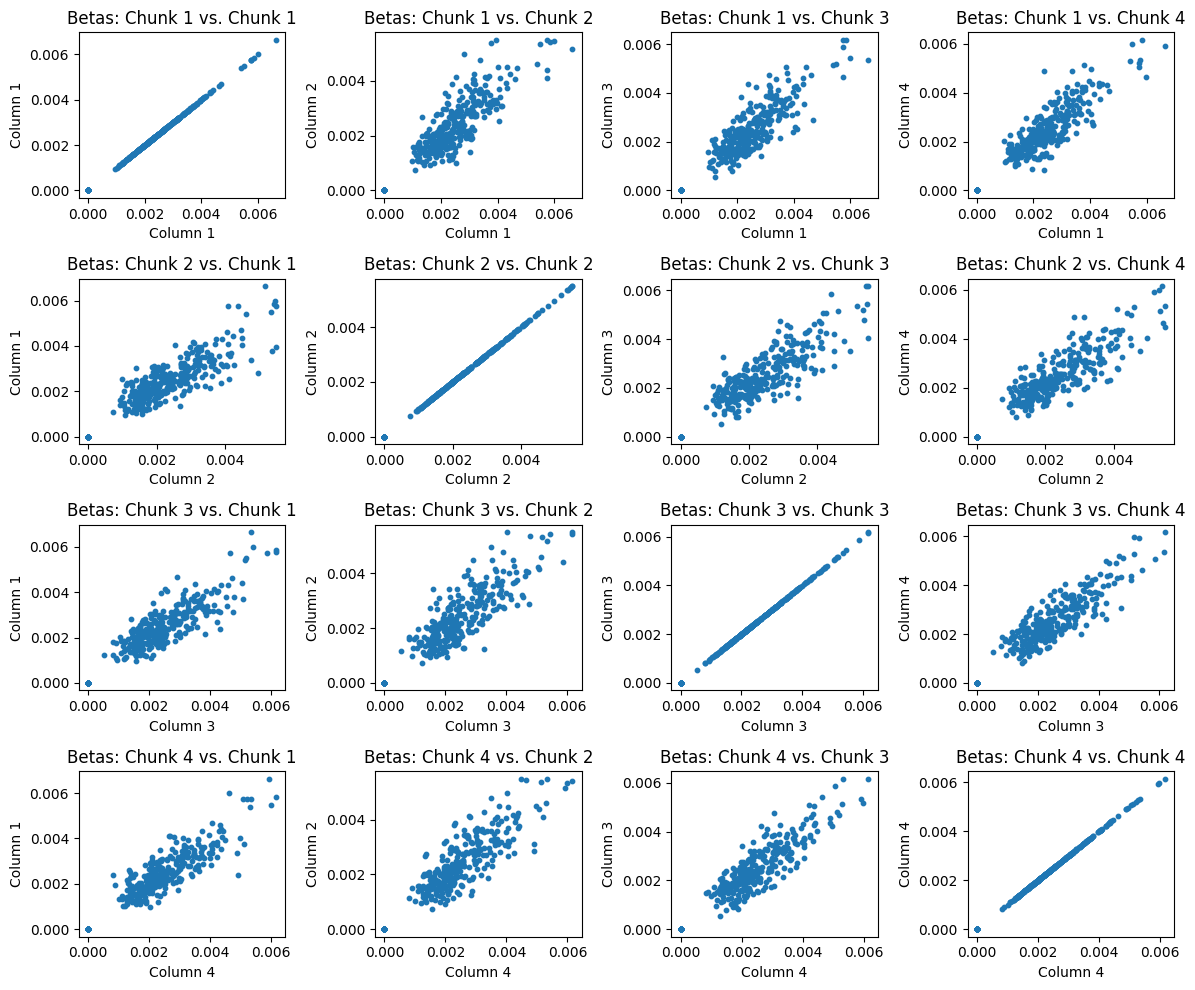

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for demonstration purposes
#bar_plot = np.random.rand(4, 5536)

# Create a 4x4 grid of subfigures
fig, axs = plt.subplots(4, 4, figsize=(12, 10))

# Loop through each pair of columns
for i in range(4):
    for j in range(4):
        # Plot the betas for the current pair of columns
        axs[i, j].scatter(bar_plot[i], bar_plot[j], s=10)
        axs[i, j].set_xlabel(f"Column {i+1}")
        axs[i, j].set_ylabel(f"Column {j+1}")
        axs[i, j].set_title(f"Betas: Chunk {i+1} vs. Chunk {j+1}")

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

/tmp/ipykernel_330978/2457852609.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Group', y='Value', data=df, palette=colors[0:len(n_states)+2])
/tmp/ipykernel_330978/2457852609.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


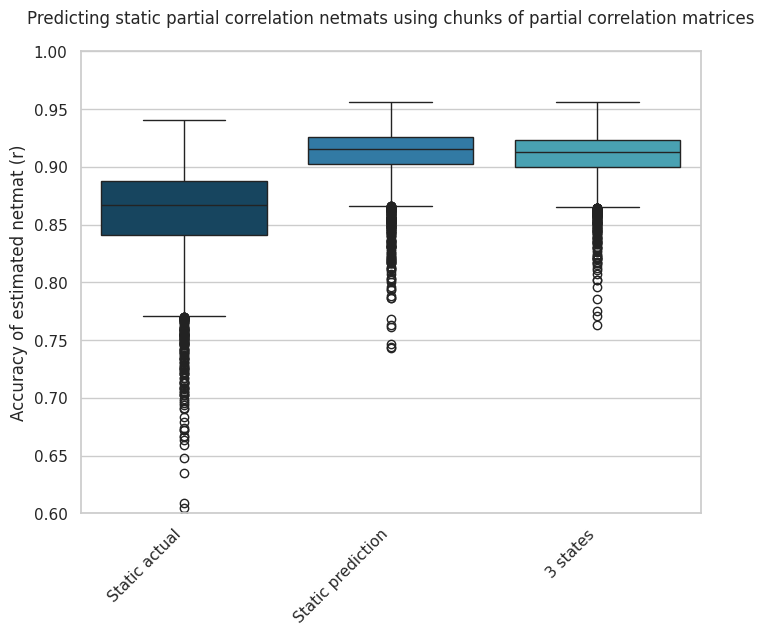

In [13]:
# TRYING TO PREDICT ICOVS USING ICOVS

n_states = [3]

# Reshape the 'prediction_accuracy_dynamic' array to (1003, 10) for each group
prediction_accuracy_dynamic_icov_reshape = np.reshape(group_level_prediction_accuracy_dynamic_icov['prediction_accuracy_dynamic_icov'][0,:,:,:], (len(n_states), -1, n_chunk))

# Flatten the arrays in the 'data' list
prediction_accuracy_static_actual_icov_flat = prediction_accuracy_static_actual_icov[0,:,:].flatten()
prediction_accuracy_static_icov_flat = prediction_accuracy_static_icov['prediction_accuracy_static_icov'][0,:,:].flatten()
prediction_accuracy_dynamic_flat = [arr.flatten() for arr in prediction_accuracy_dynamic_icov_reshape]

# Create a list of data for each group
data_boxplot1 = [prediction_accuracy_static_actual_icov_flat] +[prediction_accuracy_static_icov_flat] +  prediction_accuracy_dynamic_flat

# Create a list of group names
group_names = ['Static actual'] + ['Static prediction'] + [f'{i} states' for i in n_states]

# Create a dataframe with the data and group names
df = pd.DataFrame({'Group': np.repeat(group_names, [data_boxplot1[i].shape[0] for i in range(2+len(n_states))]),
                   'Value': np.concatenate(data_boxplot1)})

# Create the grouped boxplot using Seaborn
#colors = ['lightblue', 'lightpink', 'lightgreen', 'lightyellow', 'lavender', 'lightcoral', 'lightcyan']
colors = ['#0B486B', '#1f7fb7', '#38adc3', '#6bc6bd', '#9ad6b8', '#c8e9b3', '#e1f5ca']
sns.set(style="whitegrid")
#sns.set(style="white")
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Group', y='Value', data=df, palette=colors[0:len(n_states)+2])

# Set the x-axis and y-axis labels
plt.xlabel('')
plt.ylabel('Accuracy of estimated netmat (r)')

# Rotate the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ymin = 0.6  # Minimum y-value
ymax = 1  # Maximum y-value
ax.set_ylim(ymin, ymax)


# Set the title
plt.title("Predicting static partial correlation netmats using chunks of partial correlation matrices", fontsize=12, pad=20)

# Show the plot
plt.show()

In [14]:
group_level_prediction_accuracy_dynamic_icov['prediction_accuracy_dynamic_icov'].shape

(2, 1, 1003, 4)

In [15]:
print(prediction_accuracy_static_actual_icov_icov[np.newaxis].shape)
print(prediction_accuracy_static_icov_icov[np.newaxis].shape)
print(prediction_accuracy_dynamic_icov_icov.shape)
print(group_level_prediction_accuracy_dynamic_icov_icov.shape)

(1, 1003, 4)
(1, 1003, 4)
(1, 1003, 4)
(1, 1003, 4)


In [16]:
# Combine the arrays
combined_array = np.concatenate((prediction_accuracy_static_actual_icov_icov[np.newaxis], prediction_accuracy_static_icov_icov[np.newaxis], group_level_prediction_accuracy_dynamic_icov_icov), axis=0)
#combined_array = np.concatenate((prediction_accuracy_static_actual_icov_icov[np.newaxis], prediction_accuracy_static_icov_icov[np.newaxis], prediction_accuracy_dynamic_icov_icov, group_level_prediction_accuracy_dynamic_icov_icov), axis=0)

# Print the shape of the combined array
print(combined_array.shape)


(3, 1003, 4)


In [17]:
#n_states = [3,6,9,12,15]

/tmp/ipykernel_330978/601955962.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('twilight_shifted')


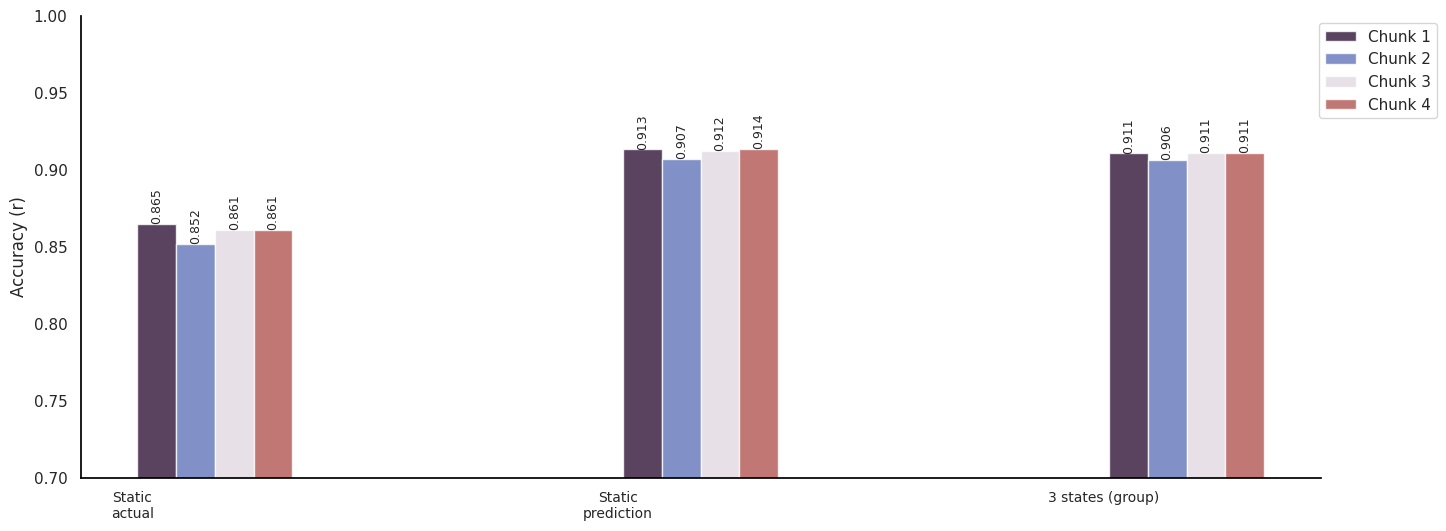

In [18]:
# Here we split up the accuracy of the chunks for using partial correlations to predict partial correlations

# Define the x-axis tick labels
labels = ['Static\nactual', 'Static\nprediction'] + [f'{i} states (group)' for i in n_states]

# Create a colormap with a smooth transition of colors
cmap = cm.get_cmap('twilight_shifted')

# Define the number of colors needed
num_colors = n_chunk

# Get a list of colors from the colormap
colors = [cmap(i / num_colors) for i in range(num_colors)]

# Create a new figure for the grouped bar chart with a larger size
fig, ax = plt.subplots(figsize=(16, 6))

# Set the width of each bar within a group
bar_width = 0.08

# Set the x-axis positions for the bars
x = np.arange(len(labels))

# Calculate the group offset
group_offset = (len(labels) - 1) * bar_width

# Iterate over the traits
for i in range(n_chunk):
    chunk_plot = combined_array[:,:,i]
    #trait_corr = np.round(traits_corrs_all_sub[trait], 2)

    # Calculate the mean values for each bar
    means = np.mean(chunk_plot, axis=1)

    # Calculate the x-axis positions for the bars within a group
    x_grouped = x + (i - 2) * bar_width - group_offset + 0.37

    # Plot the bars within a group
    bars = ax.bar(x_grouped, means, width=bar_width, color=colors[i % num_colors], alpha=0.8)

    # Add text labels on top of each bar with decreased fontsize
    for bar in bars:
        height = bar.get_height()
        #ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom', fontsize=5)
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom', fontsize=9, rotation=90)

# Set the y-axis label
ax.set_ylabel('Accuracy (r)', fontsize=12)

# Set the x-axis tick labels and move them to the left
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=10)

# Add a legend for the eight bars
ax.legend(labels=['Chunk ' + str(i+1) for i in range(n_chunk)], loc='upper right', bbox_to_anchor=(1.1, 1.0))

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the y-axis limits to range from 0.7 to 1
ax.set_ylim(0.7, 1)

# Remove the grid
ax.grid(False)

# Set the color of the x and y axis lines to black
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

# Show the plot
plt.show()

In [19]:
group_level_prediction_accuracy_dynamic_icov['beta_dynamic_icov'].shape

(2, 1, 4, 10, 325, 1072)

In [20]:
# select: icovs, 15 states for now
n_states =3
if n_states==15:
    betas_group_level = group_level_prediction_accuracy_dynamic_icov['beta_dynamic_icov'][0,4,:,:,:]
elif n_states==3:
    betas_group_level = group_level_prediction_accuracy_dynamic_icov['beta_dynamic_icov'][0,0,:,:,:]
betas_group_level_mean = np.nanmean(np.nanmean(betas_group_level,axis=1),axis=1)
betas_group_level_mean.shape

bar_plot = betas_group_level_mean
chunk_sums = np.sum(bar_plot, axis=1)

/tmp/ipykernel_330978/176911309.py:7: RuntimeWarning: Mean of empty slice
  betas_group_level_mean = np.nanmean(np.nanmean(betas_group_level,axis=1),axis=1)


In [21]:
n_channels = 25
n_covs = int(n_states * (n_channels*(n_channels-1)/2 + n_channels))
n_means = int(n_states * n_channels)
n_tpm = int(n_states * n_states)
n_summary_stats = int(n_states*4)
n_features = int(n_covs + n_means + n_tpm + (n_states * 4)) # for the summary stats

covs_sums =  np.sum(np.abs(bar_plot[:, 0:n_covs]),axis=1)
means_sums = np.sum(np.abs(bar_plot[:, n_covs:n_covs+n_means]),axis=1)
tpms_sums = np.sum(np.abs(bar_plot[:, n_covs+n_means:n_covs+n_means+n_tpm]),axis=1) 
summary_stats_sums =np.sum(np.abs(bar_plot[:, n_covs+n_means+n_tpm:n_covs+n_means+n_tpm+n_summary_stats]),axis=1) 


In [22]:
print(covs_sums)
print(means_sums)
print(tpms_sums) # 0
print(summary_stats_sums) # extremely small

[nan nan nan nan]
[nan nan nan nan]
[nan nan nan nan]
[nan nan nan nan]


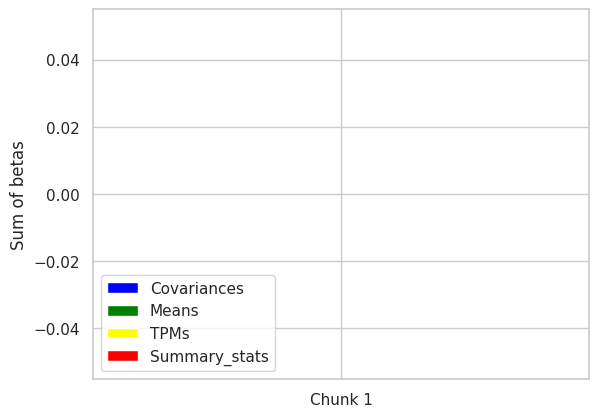

In [23]:
# Define the labels for each chunk
chunk_labels = ['Chunk 1', 'Chunk 2', 'Chunk 3', 'Chunk 4']

# Define the colors for 'covariances' and 'means'
colors = ['blue', 'green', 'yellow', 'red']

# Create the bar plot with split colors
fig, ax = plt.subplots()

# Plot 'covariances' with the first color
ax.bar(chunk_labels, covs_sums, color=colors[0])

# Plot 'means' with the second color
ax.bar(chunk_labels, means_sums, bottom=covs_sums, color=colors[1])

# Plot 'tpms' with the third color
ax.bar(chunk_labels, tpms_sums, bottom=covs_sums+means_sums, color=colors[2])

# Plot 'summary_stats' with the fourth color
ax.bar(chunk_labels, summary_stats_sums, bottom=covs_sums+means_sums+tpms_sums, color=colors[3])

# Set the title and labels for the plot
#plt.title('Bar Plot of Chunk Sums')
#iplt.xlabel('Chunks')
plt.ylabel('Sum of betas')

# Create a legend
legend_labels = ['Covariances', 'Means','TPMs','Summary_stats']
ax.legend(legend_labels)

# Display the plot
plt.show()

In [24]:
covs_sums_non_abs =  np.sum(bar_plot[:, 0:n_covs],axis=1)
means_sums_non_abs = np.sum(bar_plot[:, n_covs:n_covs+n_means],axis=1)
tpms_sums_non_abs = np.sum(bar_plot[:, n_covs+n_means:n_covs+n_means+n_tpm],axis=1) 
summary_stats_sums_non_abs =np.sum(bar_plot[:, n_covs+n_means+n_tpm:n_covs+n_means+n_tpm+n_summary_stats],axis=1) 

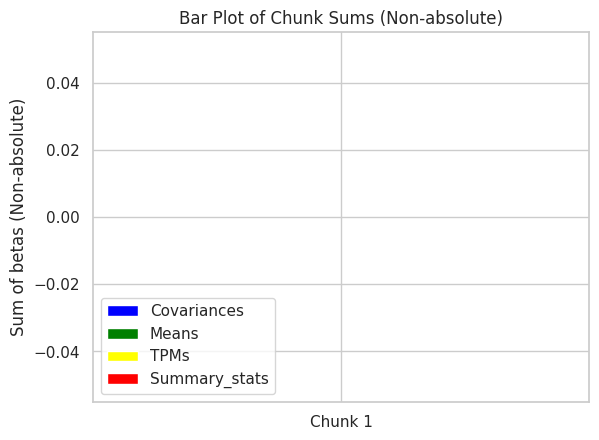

In [25]:
# Create a new plot for the new variables
fig, ax = plt.subplots()

# Plot 'covariances' with the first color
ax.bar(chunk_labels, covs_sums_non_abs, color=colors[0])

# Plot 'means' with the second color
ax.bar(chunk_labels, means_sums_non_abs, bottom=covs_sums_non_abs, color=colors[1])

# Plot 'tpms' with the third color
ax.bar(chunk_labels, tpms_sums_non_abs, bottom=covs_sums_non_abs+means_sums_non_abs, color=colors[2])

# Plot 'summary_stats' with the fourth color
ax.bar(chunk_labels, summary_stats_sums_non_abs, bottom=covs_sums_non_abs+means_sums_non_abs+tpms_sums_non_abs, color=colors[3])

# Set the title and labels for the plot
plt.ylabel('Sum of betas (Non-absolute)')
plt.title('Bar Plot of Chunk Sums (Non-absolute)')

# Create a legend
ax.legend(legend_labels)

# Display the plots
plt.show()

In [26]:
covs_mean =  np.mean(bar_plot[:, 0:n_covs],axis=1)
means_mean = np.mean(bar_plot[:, n_covs:n_covs+n_means],axis=1)
tpms_mean = np.mean(bar_plot[:, n_covs+n_means:n_covs+n_means+n_tpm],axis=1) 
summary_stats_mean =np.mean(bar_plot[:, n_covs+n_means+n_tpm:n_covs+n_means+n_tpm+n_summary_stats],axis=1) 


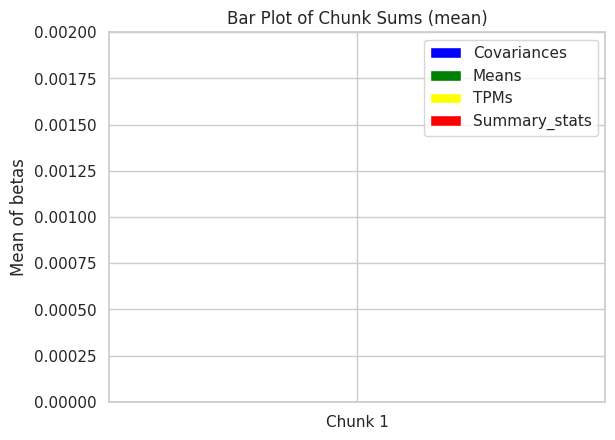

In [27]:
# Create a new plot for the new variables
fig, ax = plt.subplots()

# Plot 'covariances' with the first color
ax.bar(chunk_labels, covs_mean, color=colors[0])

# Plot 'means' with the second color
ax.bar(chunk_labels, means_mean, bottom=covs_mean, color=colors[1])

# Plot 'tpms' with the third color
ax.bar(chunk_labels, tpms_mean, bottom=covs_mean+means_mean, color=colors[2])

# Plot 'summary_stats' with the fourth color
ax.bar(chunk_labels, summary_stats_mean, bottom=covs_mean+means_mean+tpms_mean, color=colors[3])

# Set the title and labels for the plot
plt.ylabel('Mean of betas')
plt.title('Bar Plot of Chunk Sums (mean)')

# Create a legend
ax.legend(legend_labels)

# Set y-axis
if n_states==15:
    ax.set_ylim(0,0.0005)
elif n_states==3:
    ax.set_ylim(0,0.002)

# Display the plots
plt.show()

In [28]:
print(prediction_accuracy_dynamic_icov['beta_dynamic_icov'].shape) 
# 2 x 1 x 4 x 10 x 325 x 1072
# icov x 1 states x chunks x 10 folds x 325 edges to predict x 1072 features
prediction_accuracy_dynamic_icov['beta_dynamic_icov'][0,0,:,5,2,:]

(2, 1, 4, 10, 325, 1072)


array([[-0.        , -0.        ,  0.        , ...,  0.        ,
        -0.        ,         nan],
       [-0.        , -0.        ,  0.07854504, ..., -0.        ,
         0.        ,         nan],
       [-0.        , -0.        ,  0.        , ..., -0.        ,
         0.        ,         nan],
       [-0.        , -0.        ,  0.        , ...,  0.        ,
         0.        ,         nan]])

In [29]:
betas_dynamic = prediction_accuracy_dynamic_icov['beta_dynamic_icov']

print(betas_dynamic.shape)
print(np.nanmax(betas_dynamic))
print(np.nanmin(betas_dynamic))

print(betas_dynamic[0,:,:,:,:].shape)
n_states = [3]#,6,9]
n_channels=25
for j in range(len(n_states)):
    states = n_states[j]
    n_feat = int(states * (n_channels*(n_channels-1)/2 + n_channels) + states * n_channels + states * states + (states * 4))
    print(f"No. features: {n_feat}")
    print(np.nanmax(betas_dynamic[0,j,:,:,0:n_feat]))
    print(np.nanmin(betas_dynamic[0,j,:,:,0:n_feat]))
    
    # betas dynamic = [2,3,4,10,325,3268] = icov/cov x 3/6/9 states x 4 chunks x 10 folds x 325 edges x 3268 features
# 3268 features = 9*(25*(25-1)/2 + 25) + 9 * 25
# 3268 features = 9*325 + 225 + 9 * 9 + 9 * 4 (4 summary stats)
# 3268 features = 2925 + 225 + 81 + 36

betas_dynamic[0,0,].shape

(2, 1, 4, 10, 325, 1072)
0.6730191645595587
-0.4263669613958908
(1, 4, 10, 325, 1072)
No. features: 1071
0.6730191645595587
-0.4263669613958908


(4, 10, 325, 1072)

In [30]:
# from here onwards is old analysis where the model was being trained on one chunk and then applied to the next (i.e., the analysis is false so we should ignore this)
# I used to have this plot for:
# icovs predicting icovs
# covs predicting icvos
# icovs predicting covs
# covs predicting  

# however, when i re-ran the analysis, I only did it for icovs predicting icovs (this is the most useful because we definitely want to predict icovs since we know these are better, 
# and icovs have tended to better - although for the HMM, fc seems to add more information so we shouldn't just assume this.)

# see higher up for a 'correct' version of this plot. I have left this here to remind me that I used to have this plot and so could be a good idea to repdroduce
# this wit the correct analysis if relevant later on in the project.

n_states = [3,6,9]

prediction_accuracy_static_icov = np.load(f"{load_dir}/prediction_accuracy_static_icov_{n_chunk}_chunks.npy")
prediction_accuracy_static_actual_icov = np.load(f"{load_dir}/prediction_accuracy_static_actual_icov_{n_chunk}_chunks.npy")
prediction_accuracy_static_cov = np.load(f"{load_dir}/prediction_accuracy_static_cov_{n_chunk}_chunks.npy")
prediction_accuracy_static_actual_cov = np.load(f"{load_dir}/prediction_accuracy_static_actual_cov_{n_chunk}_chunks.npy")
prediction_accuracy_dynamic_icov = np.load(f"{load_dir}/prediction_accuracy_dynamic_icov_{n_chunk}_chunks.npy")
prediction_accuracy_dynamic_cov = np.load(f"{load_dir}/prediction_accuracy_dynamic_cov_{n_chunk}_chunks.npy")

# Reshape the 'prediction_accuracy_dynamic' array to (1003, 10) for each group
prediction_accuracy_dynamic_icov_reshape = np.reshape(prediction_accuracy_dynamic_icov[0,:,:,:], (len(n_states), -1, n_chunk))

# Flatten the arrays in the 'data' list
prediction_accuracy_static_actual_icov_flat = prediction_accuracy_static_actual_icov[0,:,:].flatten()
prediction_accuracy_static_icov_flat = prediction_accuracy_static_icov[0,:,:].flatten()
prediction_accuracy_dynamic_flat = [arr.flatten() for arr in prediction_accuracy_dynamic_icov_reshape]

# Create a list of data for each group
data_boxplot1 = [prediction_accuracy_static_actual_icov_flat] +[prediction_accuracy_static_icov_flat] +  prediction_accuracy_dynamic_flat

# repeat
prediction_accuracy_dynamic_icov_reshape = np.reshape(prediction_accuracy_dynamic_icov[1,:,:,:], (len(n_states), -1, n_chunk))
prediction_accuracy_static_actual_flat = prediction_accuracy_static_actual_icov[1,:,:].flatten()
prediction_accuracy_static_flat = prediction_accuracy_static_icov[1,:,:].flatten()
prediction_accuracy_dynamic_flat = [arr.flatten() for arr in prediction_accuracy_dynamic_icov_reshape]
data_boxplot2 = [prediction_accuracy_static_actual_flat] + [prediction_accuracy_static_flat] +  prediction_accuracy_dynamic_flat

# repeat
prediction_accuracy_dynamic_cov_reshape = np.reshape(prediction_accuracy_dynamic_cov[0,:,:,:], (len(n_states), -1, n_chunk))
prediction_accuracy_static_actual_cov_flat = prediction_accuracy_static_actual_cov[0,:,:].flatten()
prediction_accuracy_static_cov_flat = prediction_accuracy_static_cov[0,:,:].flatten()
prediction_accuracy_dynamic_cov_flat = [arr.flatten() for arr in prediction_accuracy_dynamic_cov_reshape]
data_boxplot3 = [prediction_accuracy_static_actual_cov_flat] +[prediction_accuracy_static_cov_flat] +  prediction_accuracy_dynamic_cov_flat

# repeat
prediction_accuracy_dynamic_cov_reshape = np.reshape(prediction_accuracy_dynamic_cov[1,:,:,:], (len(n_states), -1, n_chunk))
prediction_accuracy_static_actual_cov_flat = prediction_accuracy_static_actual_cov[1,:,:].flatten()
prediction_accuracy_static_cov_flat = prediction_accuracy_static_cov[1,:,:].flatten()
prediction_accuracy_dynamic_cov_flat = [arr.flatten() for arr in prediction_accuracy_dynamic_cov_reshape]
data_boxplot4 = [prediction_accuracy_static_actual_cov_flat] + [prediction_accuracy_static_cov_flat] +  prediction_accuracy_dynamic_cov_flat


/tmp/ipykernel_330978/974653773.py:27: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  ax = sns.boxplot(x='Sub-Group', y='Value', hue='Group', data=df, palette=colors)


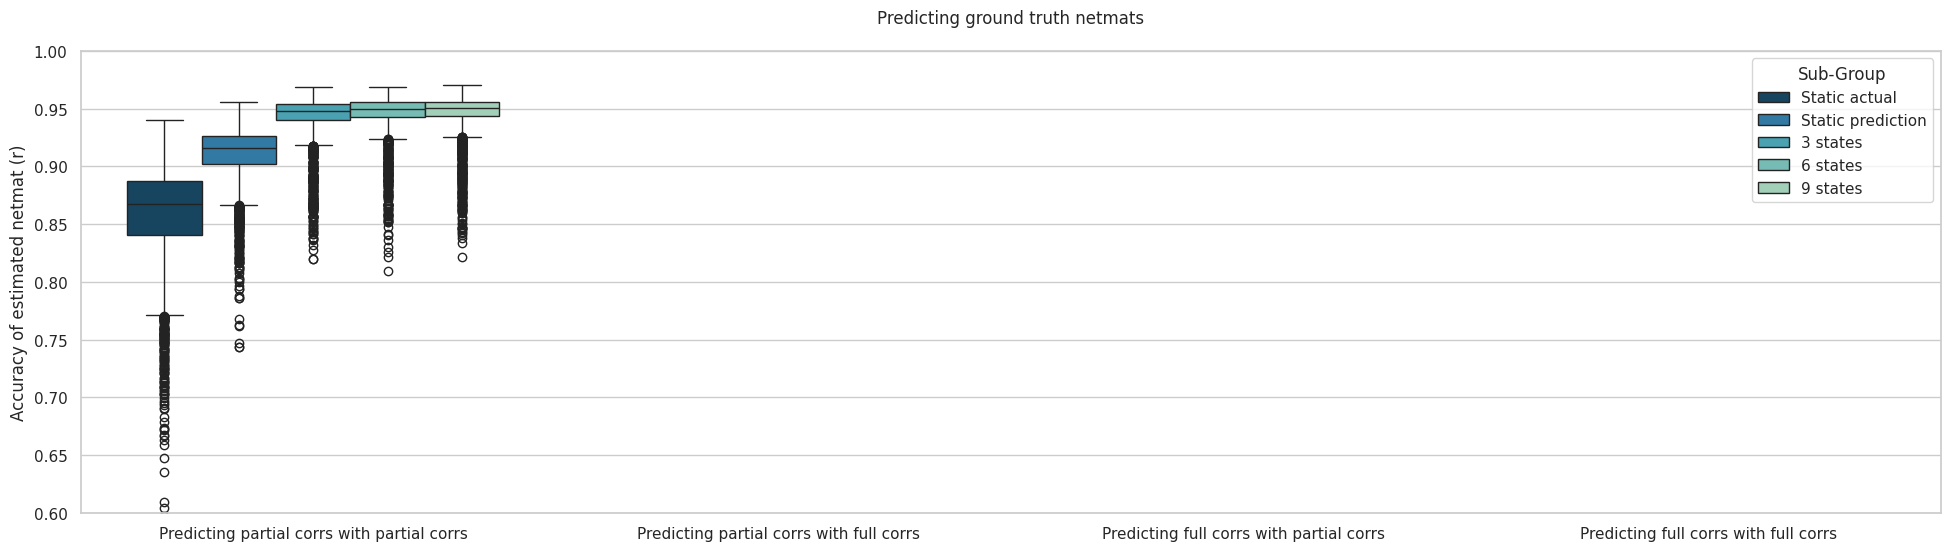

In [31]:
# Combine the data from the two boxplot sets
combined_data = data_boxplot1 + data_boxplot2 + data_boxplot3 + data_boxplot4

# Create a list of group names for the combined data
group_names = ['Static actual', 'Static prediction'] + [f'{i} states' for i in n_states]
group_names = group_names*4

# Create a list of sub-group names
sub_group_names = ['Predicting partial corrs with partial corrs', 'Predicting partial corrs with full corrs', 'Predicting full corrs with partial corrs', 'Predicting full corrs with full corrs']


# Create a dataframe with the data and group names
df = pd.DataFrame({'Group': np.repeat(group_names, [combined_data[i].shape[0] for i in range((2+len(n_states))*4)]),
                'Sub-Group': np.repeat(sub_group_names,int(combined_data[0].shape[0] * len(group_names)/4)),
                   'Value': np.concatenate(combined_data)})


# Create the grouped boxplot using Seaborn
colors = ['#0B486B', '#1f7fb7', '#38adc3', '#6bc6bd', '#9ad6b8', '#c8e9b3', '#e1f5ca']
sns.set_palette(colors)


sns.set(style="whitegrid")

# Create the grouped boxplot using Seaborn
plt.figure(figsize=(24, 6))
ax = sns.boxplot(x='Sub-Group', y='Value', hue='Group', data=df, palette=colors)

# Set the x-axis and y-axis labels
plt.xlabel('')
plt.ylabel('Accuracy of estimated netmat (r)')

# Rotate the x-axis labels by 45 degrees
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ymin = 0.6  # Minimum y-value
ymax = 1  # Maximum y-value
ax.set_ylim(ymin, ymax)

# Set the legend title
plt.legend(title='Sub-Group')

# Set the title
plt.title("Predicting ground truth netmats", fontsize=12, pad=20)

# Show the plot
plt.show()

In [32]:
prediction_accuracy_static_icov = np.load(f"{load_dir}/prediction_accuracy_static_icov_{n_chunk}_chunks.npy")
prediction_accuracy_static_actual_icov = np.load(f"{load_dir}/prediction_accuracy_static_actual_icov_{n_chunk}_chunks.npy")
prediction_accuracy_static_cov = np.load(f"{load_dir}/prediction_accuracy_static_cov_{n_chunk}_chunks.npy")
prediction_accuracy_static_actual_cov = np.load(f"{load_dir}/prediction_accuracy_static_actual_cov_{n_chunk}_chunks.npy")
prediction_accuracy_dynamic_icov = np.load(f"{load_dir}/prediction_accuracy_dynamic_icov_{n_chunk}_chunks.npy")
prediction_accuracy_dynamic_cov = np.load(f"{load_dir}/prediction_accuracy_dynamic_cov_{n_chunk}_chunks.npy")

prediction_accuracy_dynamic_icov_icov = prediction_accuracy_dynamic_icov[0,:,:,:]
prediction_accuracy_static_actual_icov_icov = prediction_accuracy_static_actual_icov[0,:,:]
prediction_accuracy_static_icov_icov = prediction_accuracy_static_icov[0,:,:]

# Combine the arrays
combined_array = np.concatenate((prediction_accuracy_static_actual_icov_icov[np.newaxis], prediction_accuracy_static_icov_icov[np.newaxis], prediction_accuracy_dynamic_icov_icov), axis=0)

# Print the shape of the combined array
print(combined_array.shape)
# this was 7 x 1003 x 8 for reference

(5, 1003, 4)


/tmp/ipykernel_330978/564690038.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('twilight_shifted')


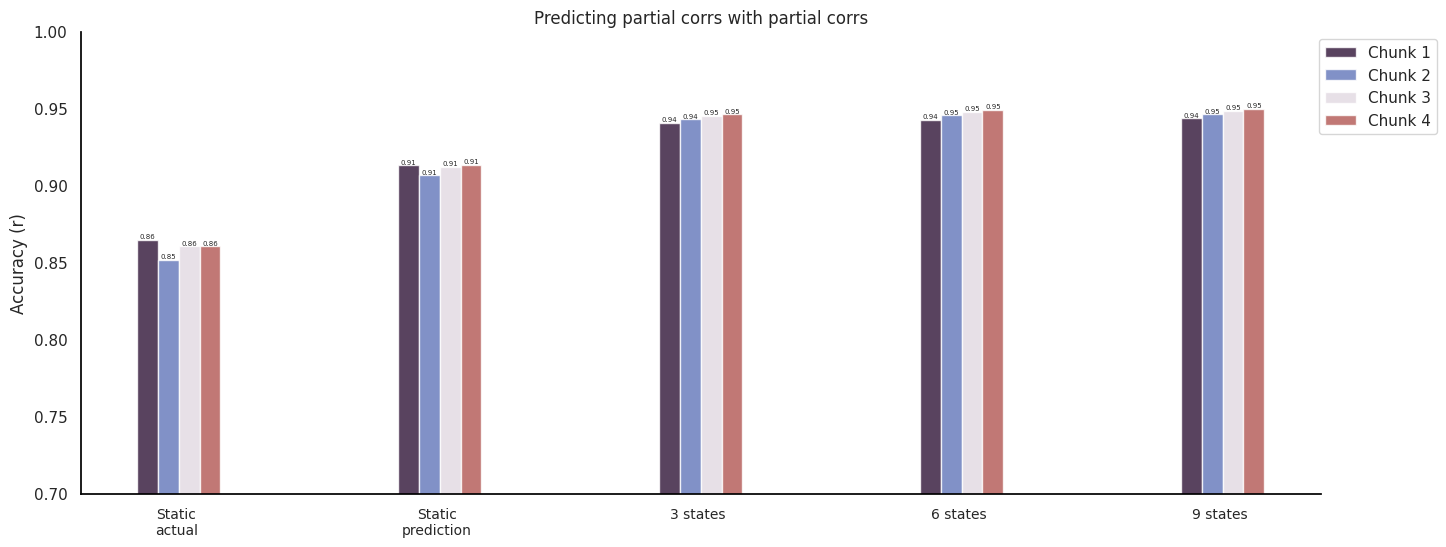

In [34]:
# Here we split up the accuracy of the chunks for using partial correlations to predict partial correlations
n_states = [3,6,9]

# Define the x-axis tick labels
labels = ['Static\nactual', 'Static\nprediction'] + [f'{i} states' for i in n_states]

# Create a colormap with a smooth transition of colors
cmap = cm.get_cmap('twilight_shifted')

# Define the number of colors needed
num_colors = n_chunk

# Get a list of colors from the colormap
colors = [cmap(i / num_colors) for i in range(num_colors)]

# Create a new figure for the grouped bar chart with a larger size
fig, ax = plt.subplots(figsize=(16, 6))

# Set the width of each bar within a group
bar_width = 0.08

# Set the x-axis positions for the bars
x = np.arange(len(labels))

# Calculate the group offset
group_offset = (len(labels) - 1) * bar_width

# Iterate over the traits
for i in range(n_chunk):
    chunk_plot = combined_array[:,:,i]
    #trait_corr = np.round(traits_corrs_all_sub[trait], 2)

    # Calculate the mean values for each bar
    means = np.mean(chunk_plot, axis=1)

    # Calculate the x-axis positions for the bars within a group
    x_grouped = x + (i - 2) * bar_width - group_offset + 0.37

    # Plot the bars within a group
    bars = ax.bar(x_grouped, means, width=bar_width, color=colors[i % num_colors], alpha=0.8)

    # Add text labels on top of each bar with decreased fontsize
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=5)

# Set the y-axis label
ax.set_ylabel('Accuracy (r)', fontsize=12)

# Set the x-axis tick labels and move them to the left
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=10)

# Add a legend for the eight bars
ax.legend(labels=['Chunk ' + str(i+1) for i in range(n_chunk)], loc='upper right', bbox_to_anchor=(1.1, 1.0))

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the y-axis limits to range from 0.7 to 1
ax.set_ylim(0.7, 1)

# Set title
ax.set_title('Predicting partial corrs with partial corrs')

# Remove the grid
ax.grid(False)

# Set the color of the x and y axis lines to black
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

# Show the plot
plt.show()